<h1><center>CSCI - 6409 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Assignment 2</h1></center>

<b>Guryash Singh Dhall</b>  
<b>(B00910690) </b>


<b>Aditya Mahale</b>  
<b>(B00867619)</b>

# 1. Data understanding and feature engineering

## 1(a)Extract the numerical and categorical features from the dataset and build the data quality report.


Adding the below snippet to avoid future warnings in the result snippets

In [1]:
# import warnings filter
from warnings import simplefilter
import warnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings 
warnings.filterwarnings('ignore')

Updating version of matplotlib to accomated axis labels used in this python notebook


In [2]:
# !pip install matplotlib==3.4

Importing essential libraries required for this assignment


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt
import matplotlib.ticker as mtick 

from sklearn.model_selection import train_test_split

Read the csv file provided for Customer Churn


In [4]:
 telecom = pd.read_csv("/content/Telecom/telco.csv")

In [5]:
telecom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,No,No,No,One year,Yes,Electronic Check,65.60,593.30,No,"01 Jan, 2010"
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed Check,59.90,542.40,No,"01 Jan, 2010"
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.90,280.85,Yes,"01 Jan, 2010"
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),98.00,1237.85,Yes,"02 Jan, 2010"
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,83.90,267.40,Yes,"03 Jan, 2010"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),55.15,742.90,No,"28 Dec, 2020"
7039,9992-RRAMN,Male,0,Yes,No,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),85.10,1873.70,Yes,"29 Dec, 2020"
7040,9992-UJOEL,Male,0,No,No,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Month-to-month,No,Credit card (automatic),50.30,92.75,No,"29 Dec, 2020"
7041,9993-LHIEB,Male,0,Yes,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),67.85,4627.65,No,"30 Dec, 2020"


Get Details of the data types and the columns present in the dataset

In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


Describing the Data frame to visualize all the features and their value ranges

In [7]:
telecom.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents PhoneService  \
0     0002-ORFBO  Female              0     Yes        Yes          Yes   
1     0003-MKNFE    Male              0      No         No          Yes   
2     0004-TLHLJ    Male              0      No         No          Yes   
3     0011-IGKFF    Male              1     Yes         No          Yes   
4     0013-EXCHZ  Female              1     Yes         No          Yes   
...          ...     ...            ...     ...        ...          ...   
7038  9987-LUTYD  Female              0      No         No           No   
7039  9992-RRAMN    Male              0     Yes         No           No   
7040  9992-UJOEL    Male              0      No         No           No   
7041  9993-LHIEB    Male              0     Yes        Yes           No   
7042  9995-HOTOH    Male              0     Yes        Yes          Yes   

     InternetService       OnlineSecurity         OnlineBackup  \

Printing first row


In [8]:
telecom.iloc[0]

customerID                0002-ORFBO
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                       Yes
PhoneService                     Yes
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract                    One year
PaperlessBilling                 Yes
PaymentMethod       Electronic Check
MonthlyCharges                  65.6
TotalCharges                   593.3
Churn                             No
Date                    01 Jan, 2010
Name: 0, dtype: object

In [9]:
telecom = telecom.convert_dtypes()
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   PhoneService      7043 non-null   string 
 6   InternetService   7043 non-null   string 
 7   OnlineSecurity    7043 non-null   string 
 8   OnlineBackup      7043 non-null   string 
 9   DeviceProtection  7043 non-null   string 
 10  TechSupport       7043 non-null   string 
 11  StreamingTV       7043 non-null   string 
 12  StreamingMovies   7043 non-null   string 
 13  Contract          7043 non-null   string 
 14  PaperlessBilling  7043 non-null   string 
 15  PaymentMethod     7043 non-null   string 
 16  MonthlyCharges    7043 non-null   Float64


### Visualizations of contiguous features:

#### Monthly Charges

Text(0.5, 1.0, 'Monthly Charges Distribution')

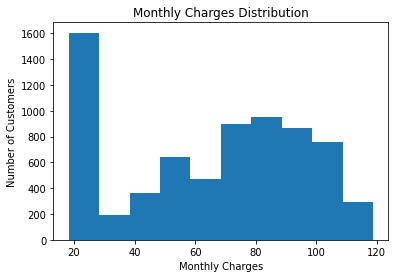

In [10]:
import matplotlib.pyplot as plt

plt.hist(telecom['MonthlyCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Monthly Charges Distribution')

#### Total Charges

Text(0.5, 1.0, 'Total Charges Distribution')

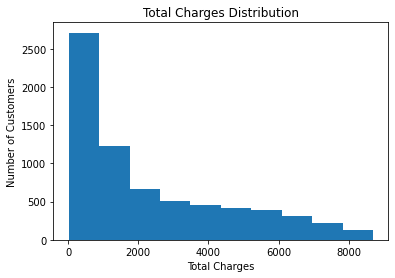

In [11]:
import matplotlib.pyplot as plt

total_charges =telecom['TotalCharges'].dropna()

plt.hist(total_charges)

plt.xlabel('Total Charges')

plt.ylabel('Number of Customers')

plt.title('Total Charges Distribution')

### Continous features report

Continuous features report includes:
1. Min
2. 1st quartile
3. Mean
4. 2nd quartile - Median
5. 3rd quartile
6. Max
7. Standard deviation
8. Total num of instances
9. % missing values
10. Cardinality - num of distinct values for a feature

Using Pandas provides a function for generating data quality reports however it doesn't include all the statistics.

In [12]:
telecom.describe(include=['number'])

,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,0.162147,64.761692,2283.300441
std,0.368612,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,0.000000,35.500000,401.450000
50%,0.000000,70.350000,1397.475000
75%,0.000000,89.850000,3794.737500
max,1.000000,118.750000,8684.800000


### Senior Citizen is a Categorical Feature, just 0 and 1 we can convert it into continous feature


In [13]:
import warnings
def build_continuous_features_report(telecom):
    
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = telecom.select_dtypes("number").columns
    continuous_data_df = telecom[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [14]:
build_continuous_features_report(telecom)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
SeniorCitizen,7043,0.000000,2,0.00,0.0,0.162147,0.000,0.0,1.00,0.368612
MonthlyCharges,7043,0.000000,1585,18.25,35.5,64.761692,70.350,89.85,118.75,30.090047
TotalCharges,7043,0.156183,6530,18.80,401.45,2283.300441,1397.475,3794.7375,8684.80,2266.771362


### Visualizing Categorical features

##### GENDER

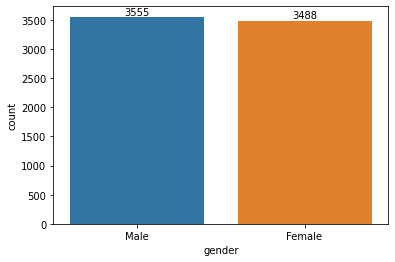

In [15]:
import seaborn as sns
ax = sns.countplot(x=telecom['gender'],
                   order=telecom['gender'].value_counts(ascending=False).index);

abs_values = telecom['gender'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### Senior Citizen

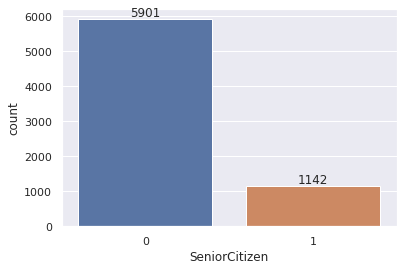

In [16]:
ax = sns.countplot(x=telecom['SeniorCitizen'],
                   order=telecom['SeniorCitizen'].value_counts(ascending=False).index);

abs_values = telecom['SeniorCitizen'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

Text(0.5, 1.0, '% of Senior Citizens')

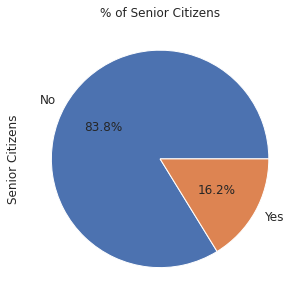

In [17]:
ax = (telecom['SeniorCitizen'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

##### PARTNER

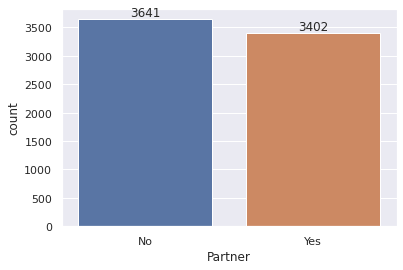

In [18]:
ax = sns.countplot(x=telecom['Partner'],
                   order=telecom['Partner'].value_counts(ascending=False).index);

abs_values = telecom['Partner'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### INTERNET SERVICE

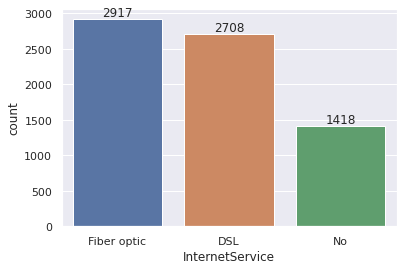

In [19]:
ax = sns.countplot(x=telecom['InternetService'],
                   order=telecom['InternetService'].value_counts(ascending=False).index);

abs_values = telecom['InternetService'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

ONLINE SECURITY

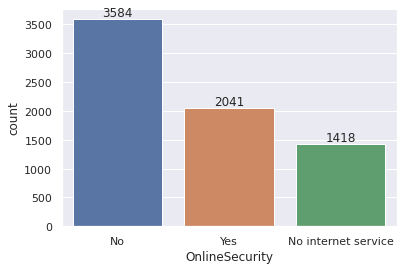

In [20]:
ax = sns.countplot(x=telecom['OnlineSecurity'],
                   order=telecom['OnlineSecurity'].value_counts(ascending=False).index);

abs_values = telecom['OnlineSecurity'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### ONLINE BACKUP

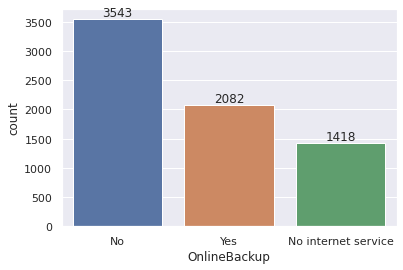

In [21]:
ax = sns.countplot(x=telecom['OnlineBackup'],
                   order=telecom['OnlineBackup'].value_counts(ascending=False).index);

abs_values = telecom['OnlineBackup'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### DEVICE PROTECTION


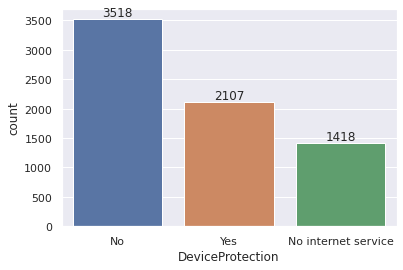

In [22]:

ax = sns.countplot(x=telecom['DeviceProtection'],
                   order=telecom['DeviceProtection'].value_counts(ascending=False).index);

abs_values = telecom['DeviceProtection'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### TECH SUPPORT


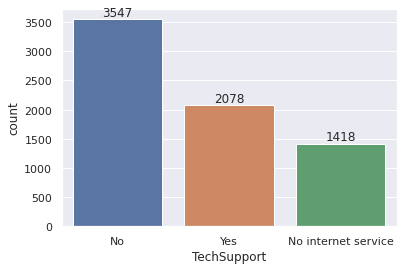

In [23]:
ax = sns.countplot(x=telecom['TechSupport'],
                   order=telecom['TechSupport'].value_counts(ascending=False).index);

abs_values = telecom['TechSupport'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### STREAMING TV

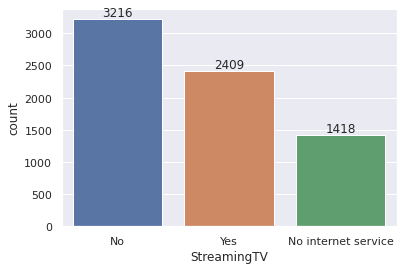

In [24]:
ax = sns.countplot(x=telecom['StreamingTV'],
                   order=telecom['StreamingTV'].value_counts(ascending=False).index);

abs_values = telecom['StreamingTV'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### STREAMING MOVIES

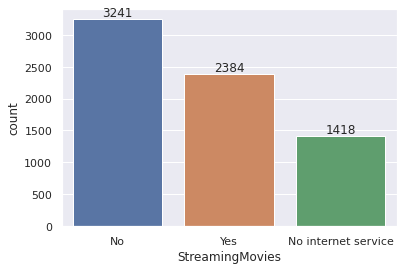

In [25]:
ax = sns.countplot(x=telecom['StreamingMovies'],
                   order=telecom['StreamingMovies'].value_counts(ascending=False).index);

abs_values = telecom['StreamingMovies'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### CONTRACT

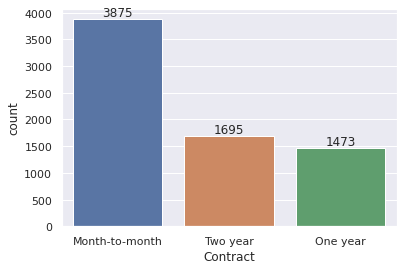

In [26]:
ax = sns.countplot(x=telecom['Contract'],
                   order=telecom['Contract'].value_counts(ascending=False).index);

abs_values = telecom['Contract'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### PAPERLESS BILLING

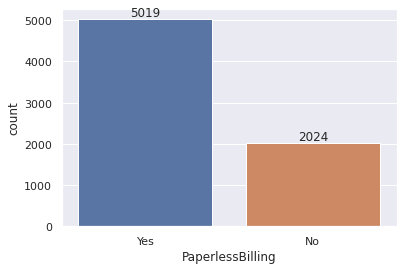

In [27]:
ax = sns.countplot(x=telecom['PaperlessBilling'],
                   order=telecom['PaperlessBilling'].value_counts(ascending=False).index);

abs_values = telecom['PaperlessBilling'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")

##### PAYMENT METHOD

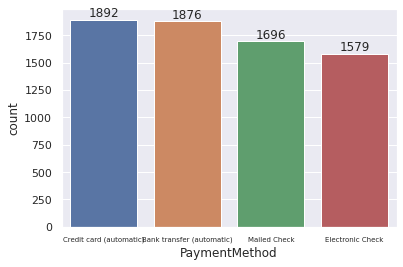

In [28]:
ax = sns.countplot(x=telecom['PaymentMethod'],
                   order=telecom['PaymentMethod'].value_counts(ascending=False).index);

abs_values = telecom['PaymentMethod'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")
ax.tick_params(axis='x', labelsize=7)

##### CHURN-- THE TARGET VARIABLE

We can observe that the churn value is having unequal distribution, so if we use the same values while training the dataset it could lead to biased results

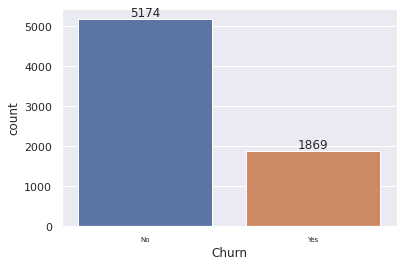

In [29]:
ax = sns.countplot(x=telecom['Churn'],
                   order=telecom['Churn'].value_counts(ascending=False).index);
abs_values = telecom['Churn'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
sns.set_theme(style="darkgrid")
ax.tick_params(axis='x', labelsize=7)

### Categorical features report

Categorical features report includes:
1. Mode - the most frequent value
2. 2nd mode - the second most frequent value
3. Frequency of mode
4. Proportion of mode in the dataset
5. Frequency of 2nd mode
6. Proportion of 2nd mode in the dataset
7. % missing values
8. Cardinality

Pandas provides a function for generating data quality reports however it doesn't include all the statistics.

In [30]:
telecom.describe(exclude=['number'])

,customerID,gender,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Date
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,2,4,2,3346
top,0002-ORFBO,Male,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),No,"04 Feb, 2011"
freq,1,3555,3641,4933,5016,2917,3584,3543,3518,3547,3216,3241,3875,5019,1892,5174,7


In [31]:
def build_categorical_features_report(telecom):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = telecom.select_dtypes(exclude="number").columns
    continuous_data_df = telecom[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [32]:
build_categorical_features_report(telecom)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
customerID,7043,0.0,7043,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043,100.000000,[],0,0.000000
gender,7043,0.0,2,[Male],3555,50.475650,[Female],3488,49.524350
Partner,7043,0.0,2,[No],3641,51.696720,[Yes],3402,48.303280
Dependents,7043,0.0,2,[No],4933,70.041176,[Yes],2110,29.958824
PhoneService,7043,0.0,2,[Yes],5016,71.219651,[No],2027,28.780349
InternetService,7043,0.0,3,[Fiber optic],2917,41.417010,[DSL],2708,38.449524
OnlineSecurity,7043,0.0,3,[No],3584,50.887406,[Yes],2041,28.979128
OnlineBackup,7043,0.0,3,[No],3543,50.305268,[Yes],2082,29.561267
DeviceProtection,7043,0.0,3,[No],3518,49.950305,[Yes],2107,29.916229
TechSupport,7043,0.0,3,[No],3547,50.362062,[Yes],2078,29.504473


In [33]:
telecom.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Date                 0
dtype: int64

<AxesSubplot:>

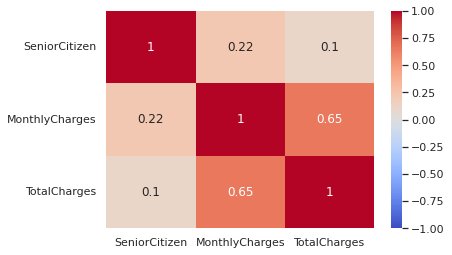

In [34]:
sb.heatmap(telecom.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## 1(b) Identifying Data Quality Issues and Building a Data Quality Plan

The following data quality issues were identified 


1.   **Missing Values** : The feature 'Total Charges' has a total of 11 missing values
2.  **Feature  Values** : There is a high divergence in the values of Monthly Charges and Total Charges for some customers.
3. **Feature Type** :Senior Citizen is a categorial feature, having values 1 and 0 and hence should not be considered as a contionous feature
4. **Outliers:** We can identify if our dataset has Outliers by creating box-plots of the suspected feature. In the data quality report of continous features, we checked the outliers in Total Charges and Monthly Charges, but there was none found.

## 1(c) Preprocess your data according to the data quality plan

Preprocessing:- 


1.  Replacing the 11 missing values in the feature 'Total  Charges' by mean of the column [1]
2.  Convert data type of Senior Citizen from string to int (Yes/No) to (1/0) [2]
3. We thought of updating total charges where there would be a high variation by observing instances where the total charges are equal to monthly charges.
There were 613 instances found where the the monthly charges and total charges are equal.  We also used a scatter plot to visualize the variation in both the fetaures. 


Updating the missing values with mean

In [35]:
telecom['TotalCharges'] = telecom['TotalCharges'].fillna(telecom['TotalCharges'].mean())

Checking the null values in the dataset after updation

In [36]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Date                0
dtype: int64

Checking the instances where the monthly charges is equal to the total charges

In [37]:
df_check = telecom[telecom['MonthlyCharges']==telecom['TotalCharges']]

In [38]:
df_check

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date
17,0021-IKXGC,Female,1,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed Check,72.1,72.1,No,"10 Jan, 2010"
19,0023-HGHWL,Male,1,No,No,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed Check,25.1,25.1,Yes,"11 Jan, 2010"
25,0032-PGELS,Female,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),30.5,30.5,Yes,"14 Jan, 2010"
48,0082-LDZUE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic Check,44.3,44.3,No,"27 Jan, 2010"
63,0107-WESLM,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.85,19.85,Yes,"03 Feb, 2010"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,9907-SWKKF,Female,1,No,No,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),25.05,25.05,Yes,"01 Dec, 2020"
7007,9940-RHLFB,Female,0,No,No,No,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),75.3,75.3,Yes,"12 Dec, 2020"
7021,9962-BFPDU,Female,0,Yes,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),20.05,20.05,No,"20 Dec, 2020"
7033,9975-SKRNR,Male,0,No,No,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),18.9,18.9,No,"26 Dec, 2020"


613 records are there where they are equal

Observing the variation of Total Charges and Monthly Charges [3]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


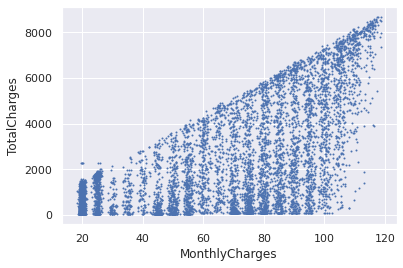

In [39]:
telecom.plot.scatter(x = 'MonthlyCharges', y = 'TotalCharges', s = 1);

#### Box plot for Monthly Charges

We can observe that there are no outliers for the feature 'Monthly Charges'

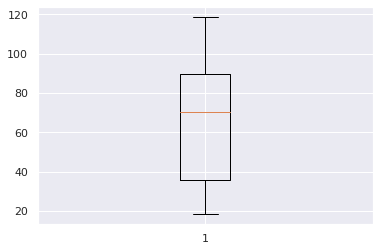

<Figure size 720x504 with 0 Axes>

54.349999999999994 171.375 -46.02499999999999
The following are the outliers in the boxplot:Series([], Name: MonthlyCharges, dtype: Float64)


In [40]:
import matplotlib.pyplot as plt

#### Column: Monthly Charges

plt.boxplot(telecom['MonthlyCharges'])
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
frp= telecom['MonthlyCharges']
q1 = np.quantile(telecom['MonthlyCharges'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(telecom['MonthlyCharges'], 0.75)
med = np.median(telecom['MonthlyCharges'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

outliers = frp[(frp <= lower_bound) | (frp >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))



### Box Plot for Total Charges

We can observe that there are no outliers for the feature 'Total Charges'

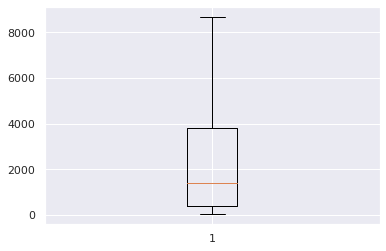

<Figure size 720x504 with 0 Axes>

3384.375 8863.1625 -4674.3375
The following are the outliers in the boxplot:Series([], Name: TotalCharges, dtype: Float64)


In [41]:

#### Column: Total Charges

plt.boxplot(telecom['TotalCharges'])
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
frp= telecom['TotalCharges']
q1 = np.quantile(telecom['TotalCharges'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(telecom['TotalCharges'], 0.75)
med = np.median(telecom['TotalCharges'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

outliers = frp[(frp <= lower_bound) | (frp >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))



## 1(d) Extract the numerical and categorical features from the dataset and build the data quality report.


The general visualizations of the features are covered in part 1(a)

#### Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.

##### The churn is higher when the total charges are lower

**Hypothesis** : Churn is not dependent on the feature 'Monthly Charges'


Text(0.5, 1.0, 'Analysis of monthly charges by churn')

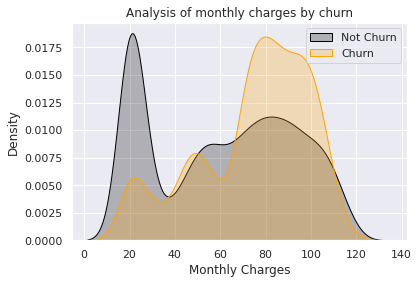

In [42]:
ax = sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"] == 'No') ],
                color="Black", shade = True)
ax = sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Analysis of monthly charges by churn')

**Hypothesis** : Churn is not dependent on the feature 'Total Charges'

Churn is maximum when the total charges is in the range 0-1000 and it is similar in case when the customer is not churned out. Hence, total charges do not provide good potential point of comparison

Text(0.5, 1.0, 'Analysis of total charges by churn')

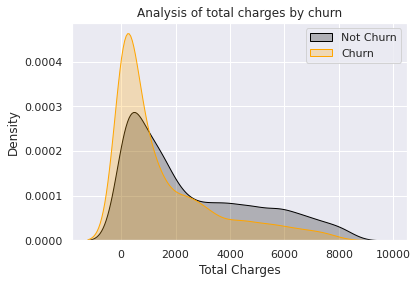

In [43]:
ax = sns.kdeplot(telecom.TotalCharges[(telecom["Churn"] == 'No') ],
                color="Black", shade = True)
ax = sns.kdeplot(telecom.TotalCharges[(telecom["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Analysis of total charges by churn')

#### Churn by Contract Type

**Hypothesis** : Churn is dependent on the type of contract customer

In [44]:
churn_contract = telecom.groupby(['Contract','Churn']).size().unstack()
churn_contract

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


We can observe that the highest churn occurs in the case of "Month to Month" contract , followed by yearly , follwed by two year contract. Hence, it is benefical to keep the customers engaged in the long term contracts to avoid churn

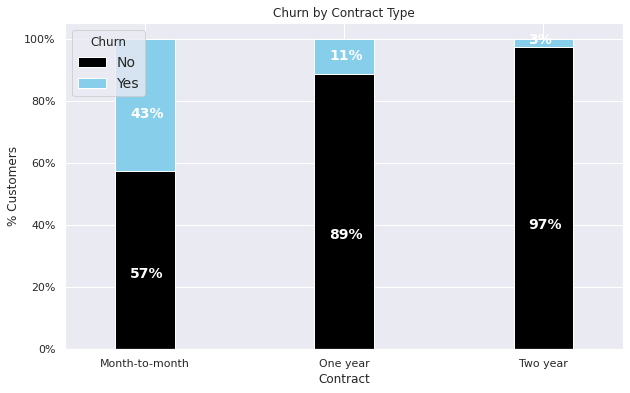

In [45]:
ax = (churn_contract.T*100.0 / churn_contract.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = ['#000000','#87CEEB'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [46]:
from datetime import date

Convert the date column to date time

In [47]:
telecom['Date'] = pd.to_datetime(telecom['Date']).dt.date

#### Calculation of Tenure column


**Tenure is a derived column for the calculating the duration the customer was there with the company. The date column in the dataset is the signup date, when the customer subscribed to the telecom company. Using this date we calculate the tenure by using the difference between today's date and signupdate. 
After this we convert the obtained value in months**




**We have also considered a scenario when the customer is churned out for that we have considered tenure as the above calclulation minus 1 month as the customer is not longer subscribed to the company.**



In [48]:
telecom['tenure'] = np.where(telecom['Churn']=='No' ,((date.today()-telecom['Date'])/( np. timedelta64(1, 'M'))),((date.today()-telecom['Date'])/( np. timedelta64(1, 'M')))-1)

In [49]:
telecom['tenure']

0       150.311095
1       150.311095
2       149.311095
3       149.278240
4       149.245385
           ...    
7038     18.431590
7039     17.398735
7040     18.398735
7041     18.365880
7042     18.365880
Name: tenure, Length: 7043, dtype: float64

#### Churn by Tenure

**Hypothesis** : Churn is dependent on the tenure of the customer

We do not observe significant difference in the churn variable with respect to tenure

Text(0.5, 1.0, 'Analysis of tenure by churn')

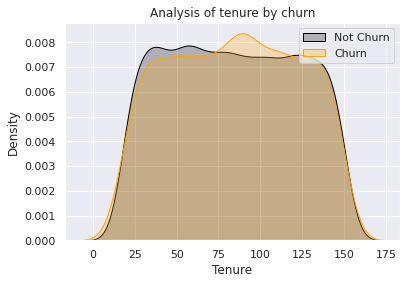

In [50]:
ax = sns.kdeplot(telecom.tenure[(telecom["Churn"] == 'No') ],
                color="Black", shade = True)
ax = sns.kdeplot(telecom.tenure[(telecom["Churn"] == 'Yes') ],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Analysis of tenure by churn')

Box plot for tenure: We can observe from the box plot that tenure is almost similar for both churn and non churn scenarios

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

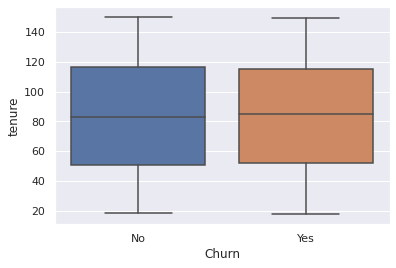

In [51]:
sns.boxplot(x = telecom.Churn, y = telecom.tenure)

One Hot Encoding of categorical features having more than 2 distinct values/categories

In [52]:
hot_encoded_df = telecom
hot_encoded_df = pd.get_dummies(hot_encoded_df, columns=['InternetService', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], prefix=['InternetService', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   string 
 1   gender                                   7043 non-null   string 
 2   SeniorCitizen                            7043 non-null   Int64  
 3   Partner                                  7043 non-null   string 
 4   Dependents                               7043 non-null   string 
 5   PhoneService                             7043 non-null   string 
 6   PaperlessBilling                         7043 non-null   string 
 7   MonthlyCharges                           7043 non-null   Float64
 8   TotalCharges                             7043 non-null   Float64
 9   Churn                                    7043 non-null   string 
 10  Date                                     7043 no

We did Label Encoding of the fetaures where we had 2 uniques values in the feature. <a href="#2">[2]</a>

In [53]:
from sklearn.preprocessing import LabelEncoder

telecom_df = hot_encoded_df.drop(columns=['customerID'])

categorical_feature = telecom_df.dtypes=="string"
final_categorical_feature = telecom_df.columns[categorical_feature].tolist()


le = LabelEncoder() 
telecom_df[final_categorical_feature] = telecom_df[final_categorical_feature].apply(lambda col: le.fit_transform(col)) 
telecom_df.head(5)



,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Date,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,1,1,1,65.6,593.3,0,2010-01-01,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,1,59.9,542.4,0,2010-01-01,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,1,1,73.9,280.85,1,2010-01-01,...,0,1,0,0,1,0,0,1,0,0
3,1,1,1,0,1,1,98.0,1237.85,1,2010-01-02,...,0,1,0,0,1,0,0,1,0,0
4,0,1,1,0,1,1,83.9,267.4,1,2010-01-03,...,0,1,0,0,1,0,0,1,0,0


Checking the data types of the features after one hot encoding and label encoding <a href="#2">[2]</a>

In [54]:
telecom_df.dtypes

gender                                       int64
SeniorCitizen                                Int64
Partner                                      int64
Dependents                                   int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             Float64
TotalCharges                               Float64
Churn                                        int64
Date                                        object
tenure                                     float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year                            uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic Check 

Converting data types of the features

In [55]:
telecom_df= telecom_df.convert_dtypes()
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   Int64  
 1   SeniorCitizen                            7043 non-null   Int64  
 2   Partner                                  7043 non-null   Int64  
 3   Dependents                               7043 non-null   Int64  
 4   PhoneService                             7043 non-null   Int64  
 5   PaperlessBilling                         7043 non-null   Int64  
 6   MonthlyCharges                           7043 non-null   Float64
 7   TotalCharges                             7043 non-null   Float64
 8   Churn                                    7043 non-null   Int64  
 9   Date                                     7043 non-null   object 
 10  tenure                                   7043 no

#### Division of Dataset into Training , Test and Validation

Removing Churn and Date from the feature list on which model is to trained. Also, we are using the derived column Tenure. Hence removing Date is a logical choice.

In [56]:
X= telecom_df.drop(['Churn','Date'],axis=1)
y=telecom_df['Churn']

Diving Training and Test data into 40% and 60% respectively [4]

In [57]:
# Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

Diving the Test data (60% of the original data) into 2 equal parts. So now our train data = 40% , test data =30% and validation data = 30%

In [58]:
# Testing an validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

#####  Using Random Oversampler for oversampling so that we do not have the biased data [5]

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [61]:
from collections import Counter

In [62]:
print(Counter(y))

Counter({0: 5174, 1: 1869})


In [63]:
y_train= y_train.astype(int)

In [64]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# 2. Build a baseline model to predict customer churn

#### Division of Dataset into Training , Test and Validation

Removing Churn and Date from the feature list on which model is to trained. Also, we are using the derived column Tenure. Hence removing Date is a logical choice.

In [65]:
X= telecom_df.drop(['Churn','Date'],axis=1)
y=telecom_df['Churn']

Diving Training and Test data into 40% and 60% respectively

In [66]:
# Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

Diving the Test data (60% of the original data) into 2 equal parts. So now our train data = 40% , test data =30% and validation data = 30%

In [67]:
# Testing an validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

As our training data is 


#####  Using Random Oversampler for oversampling so that we do not have the biased data [5]

In [68]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [70]:
from collections import Counter

In [71]:
print(Counter(y))

Counter({0: 5174, 1: 1869})


In [72]:
y_train= y_train.astype(int)

In [73]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

## 2(a) Explain what the task you’re solving is (e.g., supervised x unsupervised, classification x regression x clustering or similarity matching x, etc).
<p style="font-size: 18px">Since this data is labeled, we already know the target variable(Churn). Hence, this is a supervised learning problem. The target variable is a categorical variable. Hence, a classification model is the most suitable for this particular problem. We are performing classification to find out if there will be customer churn or not.</p>

## 2(b) Use a feature selection method to select the features to build a model.
We are using recursive feature elimination(RFE) for selecting relevant features to train our model [6]

In [74]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 16, step = 1)
rfe_selector.fit(X, y.astype(int))
cols = rfe_selector.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new.head()

,gender,SeniorCitizen,Partner,PhoneService,MonthlyCharges,TotalCharges,tenure,Contract_Month-to-month,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed Check,OnlineSecurity_No,OnlineBackup_No,TechSupport_No,StreamingTV_No,StreamingMovies_No
0,0,0,1,1,65.6,593.3,150.311095,0,0,0,0,1,1,1,1,1
1,1,0,0,1,59.9,542.4,150.311095,1,0,0,1,0,0,0,0,0
2,1,0,0,1,73.9,280.85,149.311095,1,0,0,0,1,1,1,1,1
3,1,1,1,1,98.0,1237.85,149.27824,1,0,0,0,1,1,1,1,1
4,0,1,1,1,83.9,267.4,149.245385,1,0,0,0,0,0,1,1,1


## 2(c) Select the evaluation metric. Justify your choice.

There are plenty of evaluation metrics available for classification tasks. [7]

#### Accuracy Score
The accuracy score is the ratio of correctly predicted output and the total number of predictions. [7]

#### Confusion Matrix
The confusion matrix is used to visualize the performance of a classification model. The matrix makes it easy to see if the model is confusing two classes. [7]


We are using the accuracy score for the evaluation of the model because we have used a random over sampler for balancing the data instances. Hence, the model will not train on a biased dataset.

### Baseline Model: Random Forest Classifier
Random Forest Classifier is used in classification and regression problems. This algorithm is an ensemble method that trains multiple decision trees during training time [8]. For the classification problem, the output is calculated based on the voting process. The most voted class by the decision trees is chosen as the final class. In this data set, we are classifying whether there will be customer churn.

In [75]:
from sklearn.utils.validation import check_array
feature_data = X_train_over.iloc[:,cols]
target_data = y_train_over

# from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

model_rf = RandomForestClassifier( n_estimators=12 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", max_leaf_nodes = 50)

# train the model using the training sets
model_rf.fit(feature_data, target_data)

RandomForestClassifier(max_leaf_nodes=50, n_estimators=12, n_jobs=-1,
                       oob_score=True, random_state=50)

In [76]:
X_val_fs = X_val.iloc[:,cols]

In [77]:
# Make predictions
prediction_test = model_rf.predict(X_val_fs)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dt  = round(accuracy_score(y_val.astype(int), prediction_test.astype(int))*100, 2)
print(dt)    

71.51


## 2(d) Perform hyperparameter tuning if applicable.

We are changing the values of max_leaf_nodes and estimators to get the model which best predicts the output on the test dataset. We are selecting the best model based on the highest accuracy score.

In [80]:
max_accuracy = 0
max_accuracy_model = None
optimum_estimator =0
optimum_leaf_node =0
X_plot=[]
Y_plot=[]
Z_plot=[]
for estimators in range(4, 14, 2):
  for max_leaf_nodes in range(50, 900, 50):
      model_rf = RandomForestClassifier( n_estimators=estimators , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = max_leaf_nodes)
      # train the model using the training set
      model_rf.fit(feature_data, target_data)
      prediction_test = model_rf.predict(X_val_fs)
      accuracy =round(accuracy_score(y_val.astype(int), prediction_test.astype(int))*100, 2)
      print(accuracy, max_leaf_nodes,estimators)
      X_plot.append(estimators)
      Y_plot.append(max_leaf_nodes)
      Z_plot.append(accuracy)
      if accuracy > max_accuracy:
            max_accuracy = accuracy
            optimum_estimator= estimators
            optimum_leaf_node=max_leaf_nodes
            max_accuracy_model = model_rf


71.37 50 4
73.31 100 4
73.64 150 4
73.97 200 4
74.96 250 4
74.59 300 4
74.4 350 4
74.21 400 4
74.16 450 4
74.11 500 4
74.87 550 4
74.92 600 4
74.68 650 4
74.68 700 4
74.68 750 4
74.68 800 4
74.68 850 4
71.89 50 6
74.25 100 6
74.59 150 6
75.2 200 6
75.44 250 6
75.72 300 6
75.49 350 6
75.72 400 6
75.53 450 6
75.49 500 6
75.77 550 6
76.01 600 6
75.53 650 6
75.58 700 6
75.58 750 6
75.58 800 6
75.58 850 6
71.94 50 8
74.02 100 8
74.21 150 8
74.96 200 8
75.06 250 8
75.15 300 8
75.25 350 8
74.96 400 8
75.2 450 8
74.82 500 8
75.86 550 8
76.53 600 8
76.53 650 8
76.48 700 8
76.48 750 8
76.48 800 8
76.48 850 8
71.6 50 10
73.54 100 10
73.92 150 10
75.06 200 10
75.63 250 10
75.67 300 10
76.15 350 10
75.82 400 10
75.91 450 10
75.82 500 10
76.34 550 10
76.34 600 10
76.48 650 10
76.53 700 10
76.53 750 10
76.53 800 10
76.53 850 10
71.51 50 12
73.54 100 12
73.36 150 12
75.11 200 12
75.3 250 12
75.91 300 12
76.19 350 12
76.24 400 12
76.19 450 12
76.24 500 12
77.19 550 12
77.09 600 12
76.9 650 12
76.86 700

Accuracy of the best model

In [82]:
print(max_accuracy, optimum_estimator,optimum_leaf_node)

77.19 12 550


## 2(e) Train and evaluate your model on test data.

Only picking the selected features

In [83]:
X_test_fs = X_test.iloc[:,cols]

In [84]:
prediction_test = max_accuracy_model.predict(X_test_fs)

In [85]:
accuracy = round(accuracy_score(y_test.astype(int), prediction_test.astype(int))*100, 2)

Accuracy of the Test Data

In [86]:
accuracy

75.06

## 2(f) How do you make sure that your model is not overfitting the data?

Unlike decision trees, the random forest is less likely to overfit the data because it's an ensemble method. In a decision tree, as the depth of the tree increases, so does the complexity of the model. Hence, there is a possibility of overfitting the data. However, in the case of random forests, it uses bootstrap aggregation with the ransom selection of features for a split. Also, it uses multiple decision trees. Thus the individual tree is strong but not correlated. Hence, the random forest does not need pruning [9].

## 2(g) Plot the learning curve. What can you conclude from this plot?

In [87]:
acc_train = []
acc_test = []

for estimators in range(1, 20):
    model_rf = RandomForestClassifier(n_estimators=estimators , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 800)
    # train the model using the training set
    model_rf.fit(feature_data, target_data)
    prediction_train = model_rf.predict(feature_data)
    acc_train.append(round(accuracy_score(target_data.astype(int), prediction_train.astype(int))*100, 2))
    prediction_test = model_rf.predict(X_val_fs)
    acc_test.append(round(accuracy_score(y_val.astype(int), prediction_test.astype(int))*100, 2))

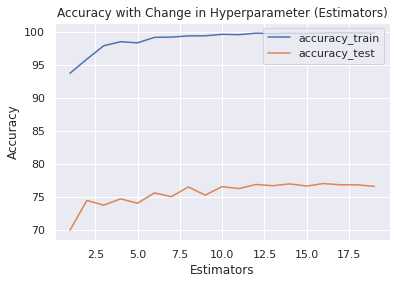

In [88]:
plt.plot(range(1, 20), acc_train, label='accuracy_train')
plt.plot(range(1, 20), acc_test, label='accuracy_test')
plt.legend(loc='upper right')
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy with Change in Hyperparameter (Estimators)")
plt.show()

We have trained and tested the model by passing a different number of estimators. It can be seen that the accuracy of both training and testing data increases and saturates after a certain point. We have used two loops to find the best hyperparameter for the model. We have tuned estimators and max_leaf_nodes to find the best possible model with the highest accuracy.

# 3. Build a NN model to predict customer churn

<p style="font-size: 16px">Keras is an open-source library for building a deep neural network. It is built on top of TensorFlow. It provides a simple interface for modeling, training, and evaluating a complex neural network architecture. We are using Keras to simplify the process of creating a neural network architecture [10].</p> 

<p style="font-size: 16px">Importing Keras Library</p>

In [89]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dropout

<p style="font-size: 16px">The problem involves the classification of the customer churn. Hence, the target variable is a binary representation. The output of the neural network can be configured as a single neuron with a sigmoid function as the activation function. The output of the neural network denotes the probability of churn [11].</p>

<p style="font-size: 16px">Creating function for building a model. 
The neural network input layer size is the same as the number of selected features in the dataset. 
Adding two hidden layers with 512 neurons in each layer. Each neuron is a "relu" activation function [11].
</p>

<p style="font-size: 16px">In each layer, the neurons are densely connected. For example, each neuron in the current layer receives input from all neurons from the previous layer [11].</p>

In [90]:
def build_NN():
  model = Sequential()
  model.add(layers.Dense(512, input_shape=(feature_data.shape[1],), activation='relu'))
  model.add(Dropout(0.2)) 
  model.add(layers.Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

## What are you doing to avoid overfitting?


<p style="font-size: 16px">
Since the neurons are densely connected, the model becomes fairly complex. Hence, there is a possibility of overfitting the training data. There are two ways to resolve the overfitting problem.
Early stopping
Dropout
The early stopping method is done by constantly evaluating the model using the validation set to ensure that the accuracy of the validation set does not drop as compared to the training accuracy. The point where the testing accuracy drops and the training accuracy continues to increase is the point where the overfitting starts. The early stopping method stops the training of the model at the point where the testing accuracy starts decreasing.
Another method to avoid overfitting the model is by using the dropout method. The dropout method randomly removes connections between neurons to avoid the building of an overly complex model. Thus, it avoids overfitting the data [12].
We have used the dropout method for avoiding overfitting the model. While training, the model drops 20% of the connections between layers to avoid the complexity of the model [12].</p>

<p style="font-size: 16px">Building the model</p>

In [91]:
nn_model = build_NN()

<p style="font-size: 16px">Using binary crossentropy loss function to calculate the loss of the model necessary for the gradient descent algorithm.</p>

In [92]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<p style="font-size: 16px">Summarizing the model</p>

In [93]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               8704      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 271,873
Trainable params: 271,873
Non-trainable params: 0
_________________________________________________________________


<p style="font-size: 16px">The model feed-forwards the training dataset to calculate the error between the predicted output of the neural network and the actual output. The network error is very high initially. The backpropagation algorithm propagates the loss backward through the layers to update the weights of the network. In each epoch, the weights are updated to reduce the overall error produced by the network.</p>

<p style="font-size: 16px">After experimenting with a few different models, we decided to go with two hidden layers and 512 neurons in each layer. We did not choose more number of layers because it causes a vanishing gradient problem. As a result, the training becomes very slow. Similarly, we found out that 512 neurons in each layer produce optimum results as compared to other lesser/greater numbers.</p>

In [94]:
fit_nn = nn_model.fit(feature_data.astype(np.float32), target_data.astype(np.float32), epochs=80, verbose=True, validation_data=(X_val_fs.astype(np.float32), y_val.astype(np.float32)), batch_size=30)

Epoch 1/80
137/137 [==============================] - 2s 9ms/step - loss: 23.2001 - accuracy: 0.5857 - val_loss: 2.4250 - val_accuracy: 0.7643
Epoch 2/80
137/137 [==============================] - 1s 7ms/step - loss: 2.6473 - accuracy: 0.6140 - val_loss: 0.6363 - val_accuracy: 0.7643
Epoch 3/80
137/137 [==============================] - 1s 9ms/step - loss: 0.7380 - accuracy: 0.6306 - val_loss: 0.6250 - val_accuracy: 0.7577
Epoch 4/80
137/137 [==============================] - 1s 9ms/step - loss: 0.6872 - accuracy: 0.6357 - val_loss: 0.5897 - val_accuracy: 0.7496
Epoch 5/80
137/137 [==============================] - 1s 8ms/step - loss: 0.6876 - accuracy: 0.6494 - val_loss: 0.6496 - val_accuracy: 0.7383
Epoch 6/80
137/137 [==============================] - 1s 8ms/step - loss: 0.6463 - accuracy: 0.6523 - val_loss: 0.6508 - val_accuracy: 0.7440
Epoch 7/80
137/137 [==============================] - 1s 8ms/step - loss: 0.6319 - accuracy: 0.6687 - val_loss: 0.6070 - val_accuracy: 0.7317
Epoch

<p style="font-size: 16px">Training Accuracy</p>

In [95]:
accuracy = nn_model.evaluate(feature_data.astype(np.float32), target_data.astype(np.float32))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

128/128 [==============================] - 1s 4ms/step - loss: 0.5338 - accuracy: 0.7390
Training Accuracy: 0.7390


<p style="font-size: 16px">Testing Accuracy</p>

In [96]:
X_test_fs=X_test.iloc[:,cols]

In [97]:
accuracy = nn_model.evaluate(X_test_fs.astype(np.float32), y_test.astype(np.float32))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

67/67 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7615
Testing Accuracy: 0.7615


## Learning Curve(Training and Testing Accuracy)

<p style="font-size: 16px">Because of the use of dropout, the model avoids overfitting. It can be seen from the learning curve that both training and testing accuracy improves with the epochs. Both testing and training accuracy converge at a certain point.</p>

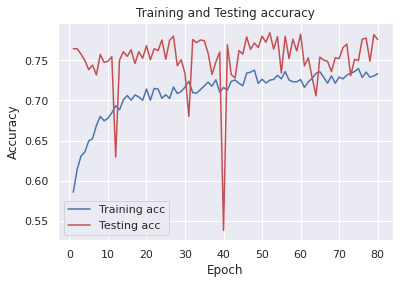

In [98]:
acc = fit_nn.history['accuracy']
val_acc = fit_nn.history['val_accuracy']
x = range(1, len(acc) + 1)

plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Testing acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing accuracy')
plt.legend()

## Learning Curve(Training and Testing Loss)

<p style="font-size: 16px">Training and testing loss both drops dramatically in the initial epochs while training the model.</p>

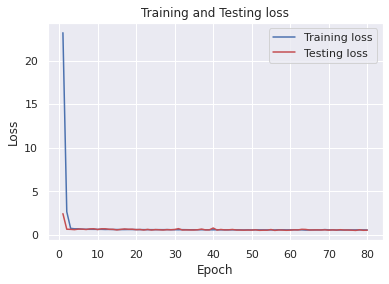

In [99]:
loss = fit_nn.history['loss']
val_loss = fit_nn.history['val_loss']
x = range(1, len(loss) + 1)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing loss')
plt.legend()

### Cross Validation of Random Forest CLassifier

In [100]:
from sklearn.model_selection import cross_val_score

validation_random_forest= cross_val_score(max_accuracy_model, X.astype(int), y.astype(int), cv=5)
validation_random_forest

array([0.76295245, 0.7707594 , 0.76863023, 0.76065341, 0.76349432])

### Cross Validation of Neural Network

In [101]:
from sklearn.model_selection import KFold
# define 5-fold cross validation test harness
kf = KFold(n_splits=5, random_state=None)
cvscores_nn = []
for train_index , test_index in kf.split(feature_data):
  X_train_nn , X_test_nn = feature_data.iloc[train_index,:],feature_data.iloc[test_index,:]
  y_train_nn , y_test_nn = target_data[train_index] , target_data[test_index]
	# create model
  model = Sequential()
  model.add(layers.Dense(512, input_shape=(feature_data.shape[1],), activation='relu'))
  model.add(Dropout(0.2)) 
  model.add(layers.Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
  model.fit(X_train_nn.astype(np.float32), y_train_nn.astype(np.float32), epochs=80, batch_size=30, verbose=0)
	# evaluate the model
  scores = model.evaluate(X_test_nn.astype(np.float32), y_test_nn.astype(np.float32), verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores_nn.append(scores[1] * 100)
 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_nn), np.std(cvscores_nn)))

accuracy: 75.98%
accuracy: 75.70%
accuracy: 70.94%
accuracy: 69.47%
accuracy: 58.00%
70.02% (+/- 6.53%)


Statistical Significance Test (Paired T test)

In [102]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=model_rf,
                          estimator2=nn_model,
                          X=feature_data.astype(int), y=target_data.astype(int),
                          scoring= 'neg_mean_squared_error',
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %5f' % p)

if p<=0.05:
    print('Null Hypothesis is rejected and we can conclude that both models do not perform equally well')
else:
    print('We cannot reject the null hypothesis since the p-value (p<0.001) is greater than 0.05.')

64/64 [==============================] - 1s 11ms/step - loss: 0.5389 - accuracy: 0.7510
t statistic: 0.593
p value: 0.579081
We cannot reject the null hypothesis since the p-value (p<0.001) is greater than 0.05.


## Box plot Comparison of Models

In [103]:
import scipy
scipy.stats.ttest_ind(validation_random_forest, [score / 100 for score in cvscores_nn])

Ttest_indResult(statistic=1.9899899529218463, pvalue=0.0817742687043898)

Box plot comparison of the cross validation done for both the models.

Text(0, 0.5, 'Accuracy %')

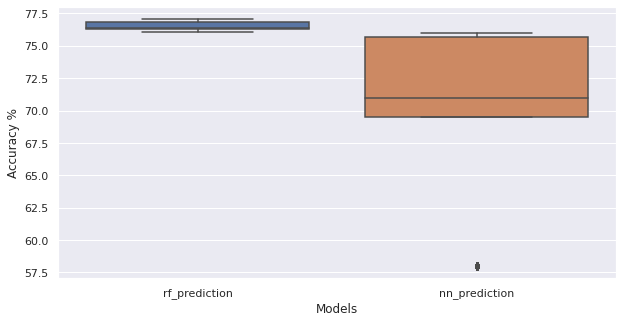

In [104]:
all_arr = [(validation_random_forest)*100, (cvscores_nn)*100]
fig = plt.figure(figsize =(10, 5))
ax=sns.boxplot(data=all_arr)
# ax.set_title('Box Plot Comparison of two models')
plt.xticks([0, 1], ['rf_prediction','nn_prediction'])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy %')

# 4. Concept drift detection

We are checking concept drift for all the continous features. We have also checked for the target variable 'Churn' which is in the integer format (1/0).
So the features we have checked the drift are:


1. Churn
2. Monthly Charges
3. Total Charges

We have not considered Tenure for checking the drift as it is a calculated feature and it is dependent on the target variable, hence checking drift for that feature would give us biased results.





Installing the required package for checking the concept drift

In [105]:
!pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Checking concept drift for the "Churn" variable

*   We created a line chart of churn to check the variation over time
*  Measured the change through ADWIN( Adaptive Windowing) an adaptive sliding window algorithm for detecting change, and keeping updated statistics about a data stream



There was no drift detected for the target variable 'Churn'




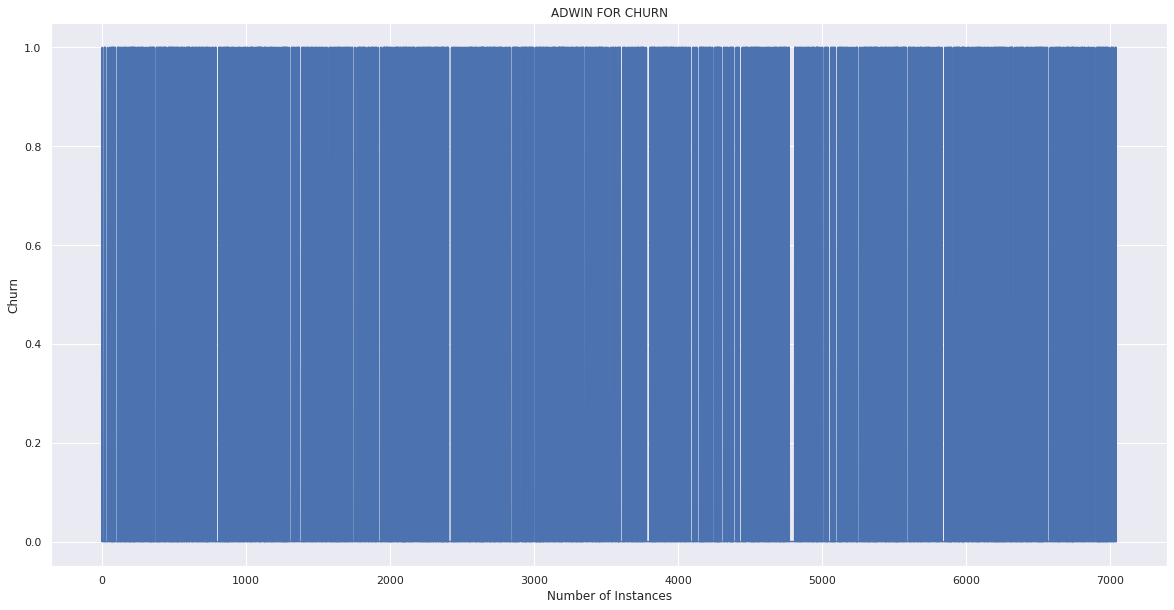

In [106]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import ADWIN
from skmultiflow.drift_detection import ADWIN

# Churn Variable
churn =np.array(y)


plt.figure(figsize=(20, 10))
plt.plot(churn)
plt.title('ADWIN FOR CHURN')
plt.ylabel('Churn')
plt.xlabel('Number of Instances')
# instantiate ADWIN object 
adwin = ADWIN()

# for each data point in stream 
for i in range(churn.size):
    # add a new point to adwin object
    adwin.add_element(churn[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

### Checking concept drift for the "Total Charges" feature

*   We created a line chart of Total Charges to check the variation over time
*  Measured the change through ADWIN( Adaptive Windowing) an adaptive sliding window algorithm for detecting change, and keeping updated statistics about a data stream



There was no drift detected for the feature 'Total Charges'




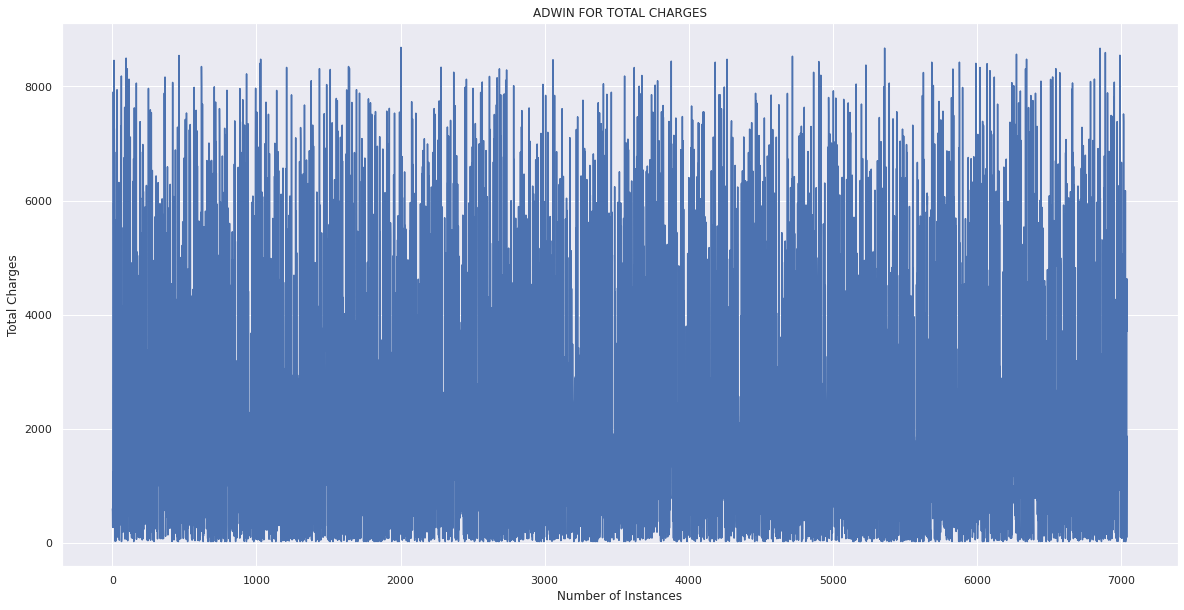

In [107]:
#Total Charges
TotalCharges =telecom_df['TotalCharges']
TotalCharges=np.array(TotalCharges)

plt.figure(figsize=(20, 10))
plt.plot(TotalCharges)
plt.title('ADWIN FOR TOTAL CHARGES')
plt.ylabel('Total Charges')
plt.xlabel('Number of Instances')

# instantiate ADWIN object 
adwin = ADWIN()

# for each data point in stream 
for i in range(TotalCharges.size):
    # add a new point to adwin object
    adwin.add_element(TotalCharges[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

Checking concept drift for the "Monthly Charges" feature

*   We created a line chart of Monthly Charges to check the variation over time
*  Measured the change through ADWIN( Adaptive Windowing) an adaptive sliding window algorithm for detecting change, and keeping updated statistics about a data stream



There was no drift detected for the feature 'Monthly Charges'



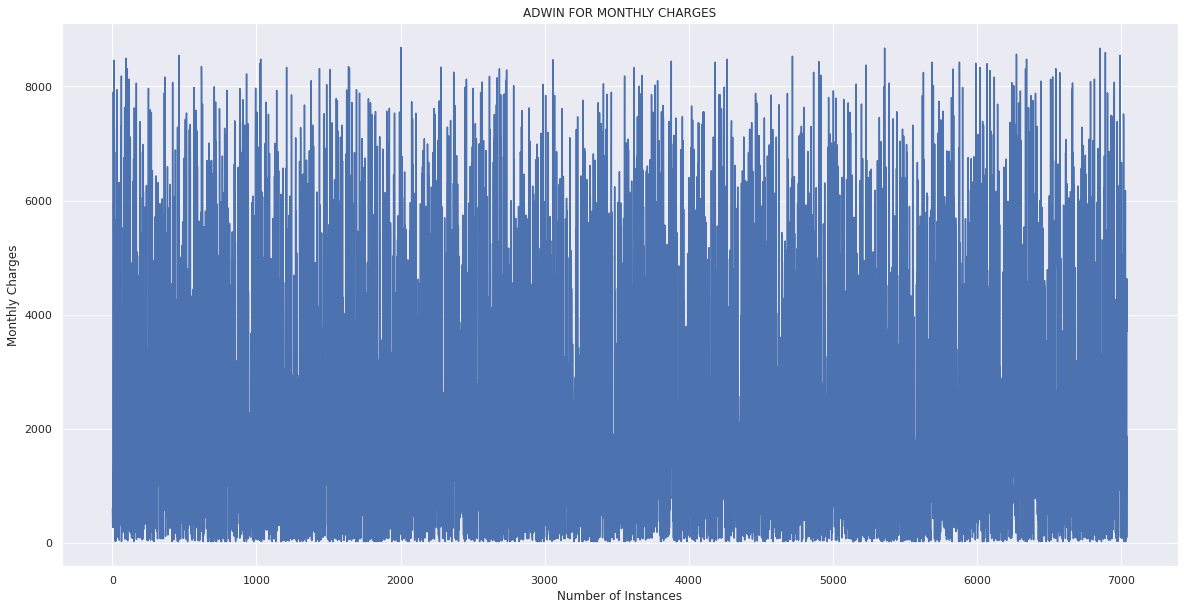

In [108]:
#Monthly Charges
MonthlyCharges =telecom_df['MonthlyCharges']
MonthlyCharges=np.array(MonthlyCharges)

plt.figure(figsize=(20, 10))
plt.plot(TotalCharges)
plt.title('ADWIN FOR MONTHLY CHARGES')
plt.ylabel('Monthly Charges')
plt.xlabel('Number of Instances')

# instantiate ADWIN object 
adwin = ADWIN()

# for each data point in stream 
for i in range(MonthlyCharges.size):
    # add a new point to adwin object
    adwin.add_element(MonthlyCharges[i])
    
    # if adwin detects change, print at what point in the stream 
    # the change was detected
    if adwin.detected_change():
        print('Change detected at index {}'.format(i))

We did not find any type of Concept drift in the dataset by analyzing the above features!

# References 


[1] "Dealing With Missing Values in Python - Analytics Vidhya", Analytics Vidhya, 2022. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/. [Accessed: 08- Jul- 2022]

[2] "sklearn.preprocessing.LabelEncoder", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. [Accessed: 09- Jul- 2022]

[3] "matplotlib.pyplot.scatter — Matplotlib 3.5.2 documentation", Matplotlib.org, 2022. [Online]. Available: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html. [Accessed: 10- Jul- 2022]

[4] "sklearn.model_selection.train_test_split", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. [Accessed: 09- Jul- 2022]

[5] J. Brownlee, "Random Oversampling and Undersampling for Imbalanced Classification", Machine Learning Mastery, 2022. [Online]. Available: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/. [Accessed: 10- Jul- 2022]

[6] Dropi . [Online]. Available: https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer. [Accessed: 07- Jul- 2022].

[7] K. Team, "Keras documentation: The Sequential class", Keras.io, 2022. [Online]. Available: https://keras.io/api/models/sequential/. [Accessed: 12- Jul- 2022].

[8] K. Team, "Keras: the Python deep learning API", Keras.io, 2022. [Online]. Available: https://keras.io. [Accessed: 06- Jul- 2022].

[9] D. overfit? and A. Grigorev, "Do Random Forest overfit?", Data Science Stack Exchange, 2022. [Online]. Available: https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit. [Accessed: 09- Jul- 2022].


[10] "sklearn.ensemble.RandomForestClassifier", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed: 10- Jul- 2022].


[11] "Evaluation Metrics For Classification Model | Classification Model Metrics", Analytics Vidhya, 2022. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/. [Accessed: 10- Jul- 2022].

[12] J. Brownlee, "Recursive Feature Elimination (RFE) for Feature Selection in Python", Machine Learning Mastery, 2022. [Online]. Available: https://machinelearningmastery.com/rfe-feature-selection-in-python/. [Accessed: 08- Jul- 2022].

[13] A.Mahale, H.Lakhani, "Assignment 1." Dalhousie University, [Online], 2022. [Accessed 05-Jul-2022]

[14] G.Dhall, B.Jindal, "Assignment 1." Dalhousie University, [Online], 2022. [Accessed 05-Jul-2022]

[15] M.Taranukhin, "Tutorial- Streams" Dalhousie University, [Online], 2022. [Accessed 05-Jul-2022]